In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('consultasyhonorarios.csv')
df

,Fecha,Honorarios,HonorariosCompletados
0,2024-02-11,31,31
1,2024-02-14,40,40
2,2024-02-17,-,15
3,2024-02-22,-,12
4,2024-02-24,-,12
5,2024-02-28,24,24
6,2024-03-02,-,19
7,2024-03-07,-,10
8,2024-03-11,-,19
9,2024-03-13,22,22


In [37]:
# si honorarios es "-" poner un numero random entre 8 y 20
df['HonorariosCompletados'] = df['Honorarios'].apply(lambda x: np.random.randint(8, 20) if x == '-' else x)
df.to_csv('consultasyhonorarios.csv', index=False)

In [38]:
diferencia_llegadas = []
fechas = df["Fecha"].to_list()
for i in range(len(fechas) - 1):
    fecha1 = pd.to_datetime(fechas[i])
    fecha2 = pd.to_datetime(fechas[i + 1])
    diferencia = fecha2 - fecha1
    diferencia_llegadas.append(diferencia)

#change timedelta to int in days
diferencia_llegadas = [x.days for x in diferencia_llegadas]
diferencia_llegadas

[3, 3, 5, 2, 4, 3, 5, 4, 2, 5, 2, 3, 5, 3, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2]

2024-05-05 16:56:51.949 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-05 16:56:52.250 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=288.6886)
2024-05-05 16:56:52.915 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=288.784169)
2024-05-05 16:56:53.079 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=284.658804)
2024-05-05 16:56:53.138 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=261.352433)
2024-05-05 16:56:53.227 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=289.086224)
2024-05-05 16:56:53.277 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=288.741226)
2024-05-05 16:56:53.354 | INFO     | fitter.fitter:_fit_single_distr

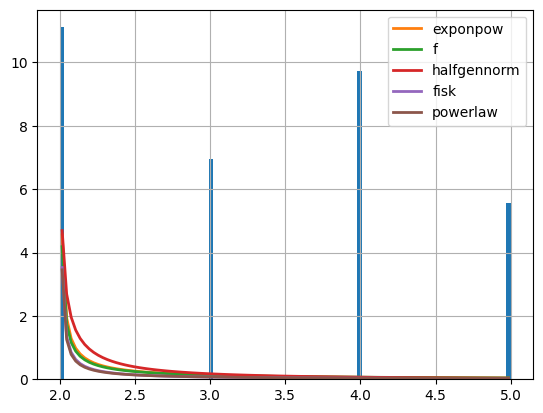

In [12]:
import pickle

from fitter import Fitter
fitter_llegadas = Fitter(diferencia_llegadas)
fitter_llegadas.fit()
fitter_llegadas.summary()
with open('fitter_llegadas.pkl', 'wb') as f:
    pickle.dump(fitter_llegadas, f)

2024-05-05 18:24:49.622 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-05 18:24:50.615 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.725171)
2024-05-05 18:24:50.666 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=0.724988)
2024-05-05 18:24:51.131 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.727591)
2024-05-05 18:24:51.217 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.761707)
2024-05-05 18:24:51.311 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.739724)
2024-05-05 18:24:51.326 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.742755)
2024-05-05 18:24:51.893 | INFO     | fitter.fitter:_fit_single_distribution:337 

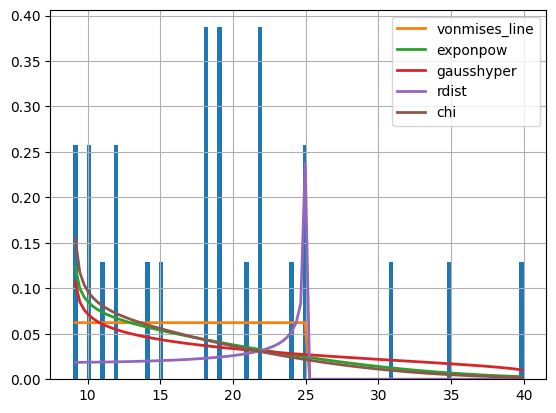

In [41]:
fitter_honorarios = Fitter(df['HonorariosCompletados'].astype(int))
fitter_honorarios.fit()
fitter_honorarios.summary()
with open('fitter_honorarios.pkl', 'wb') as f:
    pickle.dump(fitter_honorarios, f)

2024-05-05 17:06:48.657 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-05 17:06:49.309 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.13304)
2024-05-05 17:06:49.551 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.127678)
2024-05-05 17:06:50.106 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.120298)
2024-05-05 17:06:50.261 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.133643)
2024-05-05 17:06:51.105 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.129077)
2024-05-05 17:06:51.121 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.135402)
2024-05-05 17:06:51.754 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitt

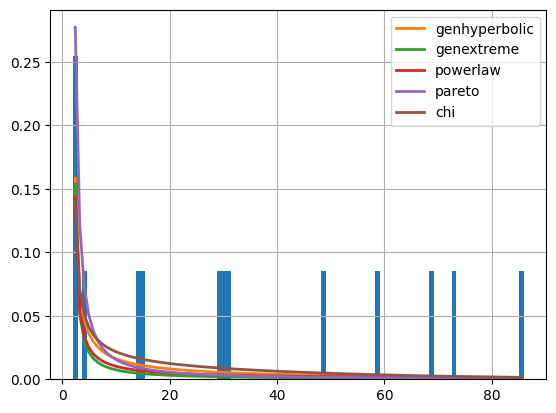

In [16]:
df_duracion = pd.read_csv('duracionterapia.csv')
fitter_duracion = Fitter(df_duracion['Duracion'])
fitter_duracion.fit()
fitter_duracion.summary()
with open('fitter_duracion.pkl', 'wb') as f:
    pickle.dump(fitter_duracion, f)

In [25]:
best_llegadas = fitter_llegadas.get_best()["exponpow"]
best_honorarios = fitter_honorarios.get_best()["mielke"]
best_duracion = fitter_duracion.get_best()["genhyperbolic"]
print(best_llegadas)
print(best_honorarios)
print(best_duracion)

{'b': 0.2530355326169663, 'loc': 1.9999999999999998, 'scale': 2.220442218350816}
{'k': 98.9292288769887, 's': 2.0254220214519876, 'loc': 14.861378634704273, 'scale': 0.02783457664798305}
{'p': 0.24829868410300127, 'a': 0.9027799441751452, 'b': 0.9027799436159013, 'loc': 1.9999999434593596, 'scale': 7.062554221953598e-08}


In [ ]:
from scipy.stats import exponpow, mielke, genhyperbolic

distribucion_llegada = lambda : exponpow.rvs(best_llegadas[0]["b"], loc=best_llegadas[0]["loc"], scale=best_llegadas[0]["scale"])

distribucion_honorarios = lambda : mielke.rvs(best_honorarios[0]["k"], best_honorarios[0]["s"], loc=best_honorarios[0]["loc"], scale=best_honorarios[0]["scale"])

distribucion_duracion = lambda : genhyperbolic.rvs(best_duracion[0]["p"], best_duracion[0]["a"], best_duracion[0]["b"], loc=best_duracion[0]["loc"], scale=best_duracion[0]["scale"])



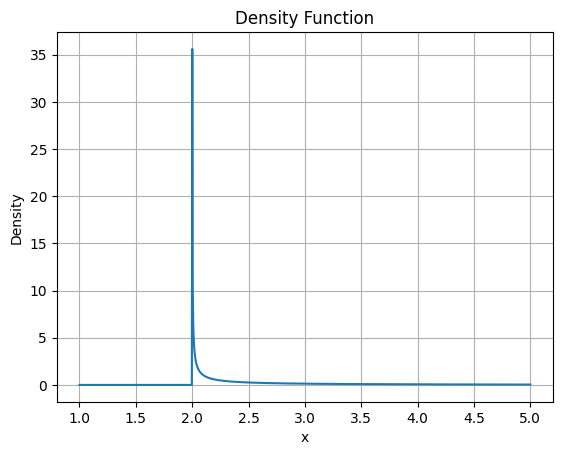

In [31]:
#plot llegadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponpow  # Example distribution, replace with your distribution

# Assuming you have the parameters for your distribution
# Replace 'dist' with your specific distribution and pass the parameters accordingly
params = (best_llegadas["b"],)  # Example parameters for mean=0 and standard deviation=1

# Additional keyword arguments
kwargs = {'loc': best_llegadas["loc"], 'scale': best_llegadas["scale"]}  # Example for loc and scale, replace with your specific kwargs

# Generate data points
x = np.linspace(1, 5, 1000)

# Calculate the density function using the pdf method of the distribution
density = exponpow.pdf(x, *params, **kwargs)  # Replace 'norm' with your specific distribution

# Plot the density function
plt.plot(x, density)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Function')
plt.grid(True)
plt.show()


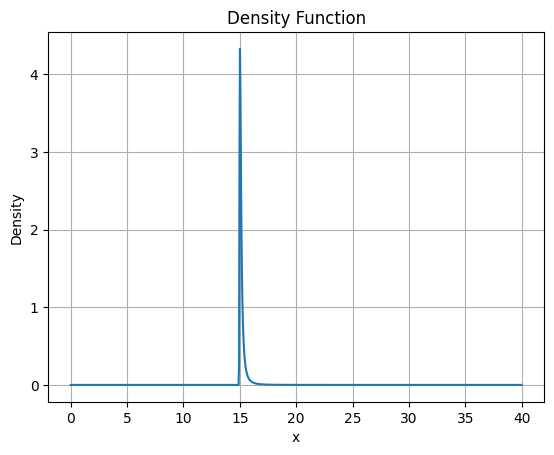

In [32]:
#plot honorarios
from scipy.stats import mielke  # Example distribution, replace with your distribution

# Assuming you have the parameters for your distribution
# Replace 'dist' with your specific distribution and pass the parameters accordingly
params = (best_honorarios["k"], best_honorarios["s"])  # Example parameters for mean=0 and standard deviation=1

# Additional keyword arguments
kwargs = {'loc': best_honorarios["loc"], 'scale': best_honorarios["scale"]}  # Example for loc and scale, replace with your specific kwargs

# Generate data points
x = np.linspace(0, 40, 1000)

# Calculate the density function using the pdf method of the distribution
density = mielke.pdf(x, *params, **kwargs)  # Replace 'norm' with your specific distribution

# Plot the density function
plt.plot(x, density)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Function')
plt.grid(True)
plt.show()

